# Pylops - wavelets

### Author: M.Ravasi

In this notebook, we will explore the `pylops.utils.wavelets` submodule.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import pylops
from pylops.utils.wavelets import *

/Users/ravasim/Desktop/KAUST/OpenSource/pylops/pylops/utils/wavelets.py:13: UserWarning: one sample removed from time axis...
  warnings.warn("one sample removed from time axis...")


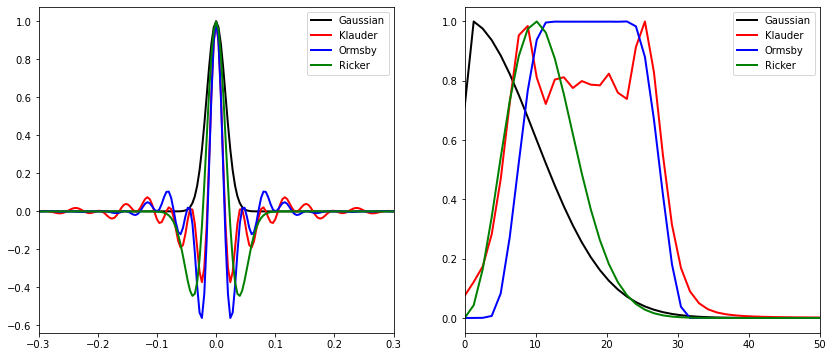

In [2]:
dt = 0.004
nt = 100
t = np.arange(nt) * dt

Fop = pylops.signalprocessing.FFT(2*(nt-1)-1, sampling=dt, real=True)

# Gaussian
wg, twg, wgc = gaussian(t, 4)

# Gaussian
wk, twk, wgk = klauder(t, [4, 30], taper=np.hanning)

# Ormsby
wo, two, woc = ormsby(t, [5,10, 25, 30], taper=np.hanning)

# Ricker
wr, twr, wrc = ricker(t, 10)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].plot(twg, wg, 'k', lw=2, label='Gaussian')
axs[0].plot(twk, wk, 'r', lw=2, label='Klauder')
axs[0].plot(two, wo, 'b', lw=2, label='Ormsby')
axs[0].plot(twr, wr, 'g', lw=2, label='Ricker')
axs[0].legend()
axs[0].set_xlim(-.3, .3)
axs[1].plot(Fop.f, np.abs(Fop @ wg) / np.abs(Fop @ wg).max(), 'k', lw=2, label='Gaussian')
axs[1].plot(Fop.f, np.abs(Fop @ wk) / np.abs(Fop @ wk).max(), 'r', lw=2, label='Klauder')
axs[1].plot(Fop.f, np.abs(Fop @ wo) / np.abs(Fop @ wo).max(), 'b', lw=2, label='Ormsby')
axs[1].plot(Fop.f, np.abs(Fop @ wr) / np.abs(Fop @ wr).max(), 'g', lw=2, label='Ricker')
axs[1].set_xlim(0, 50)
axs[1].legend();